In [163]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from constants import tablesDirectory, audioDirectory, audioFileExtension

## Loading audio files with Librosa

In [144]:
filename = "ASCrocodile"
audio_file = audioDirectory + filename + audioFileExtension

In [145]:
ipd.Audio(audio_file)

In [146]:
# load audio files with librosa
signal, sr = librosa.load(audio_file)

## Extracting MFCCs

In [147]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [148]:
mfccs.shape

(13, 776)

## Visualising MFCCs

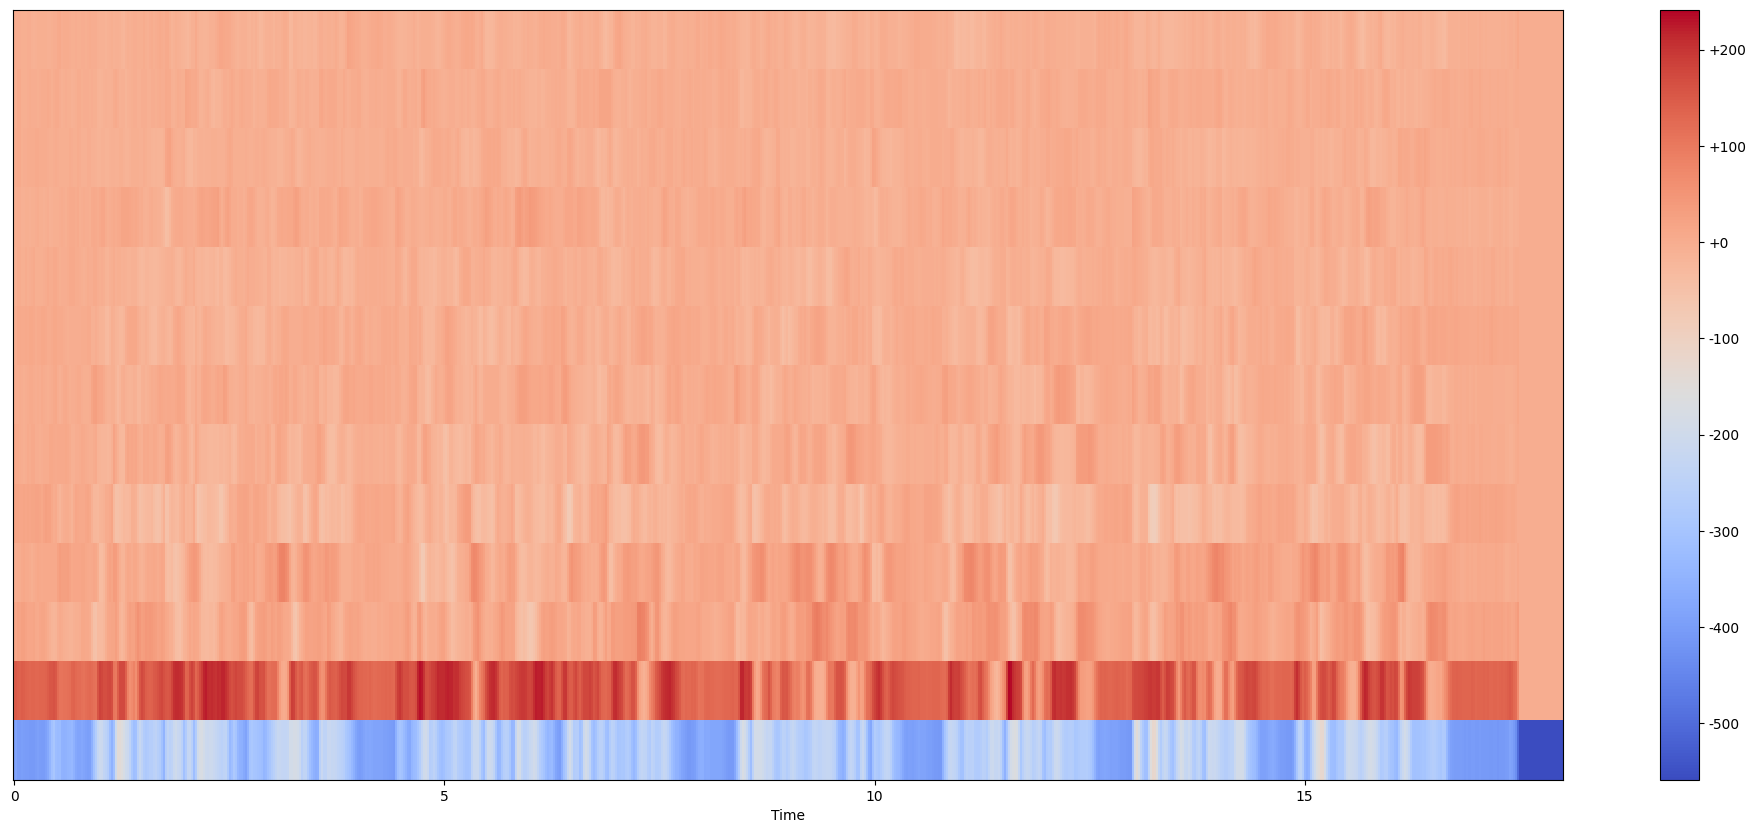

In [149]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Computing first / second MFCCs derivatives

In [150]:
delta_mfccs = librosa.feature.delta(mfccs)

In [151]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [152]:
delta_mfccs.shape

(13, 776)

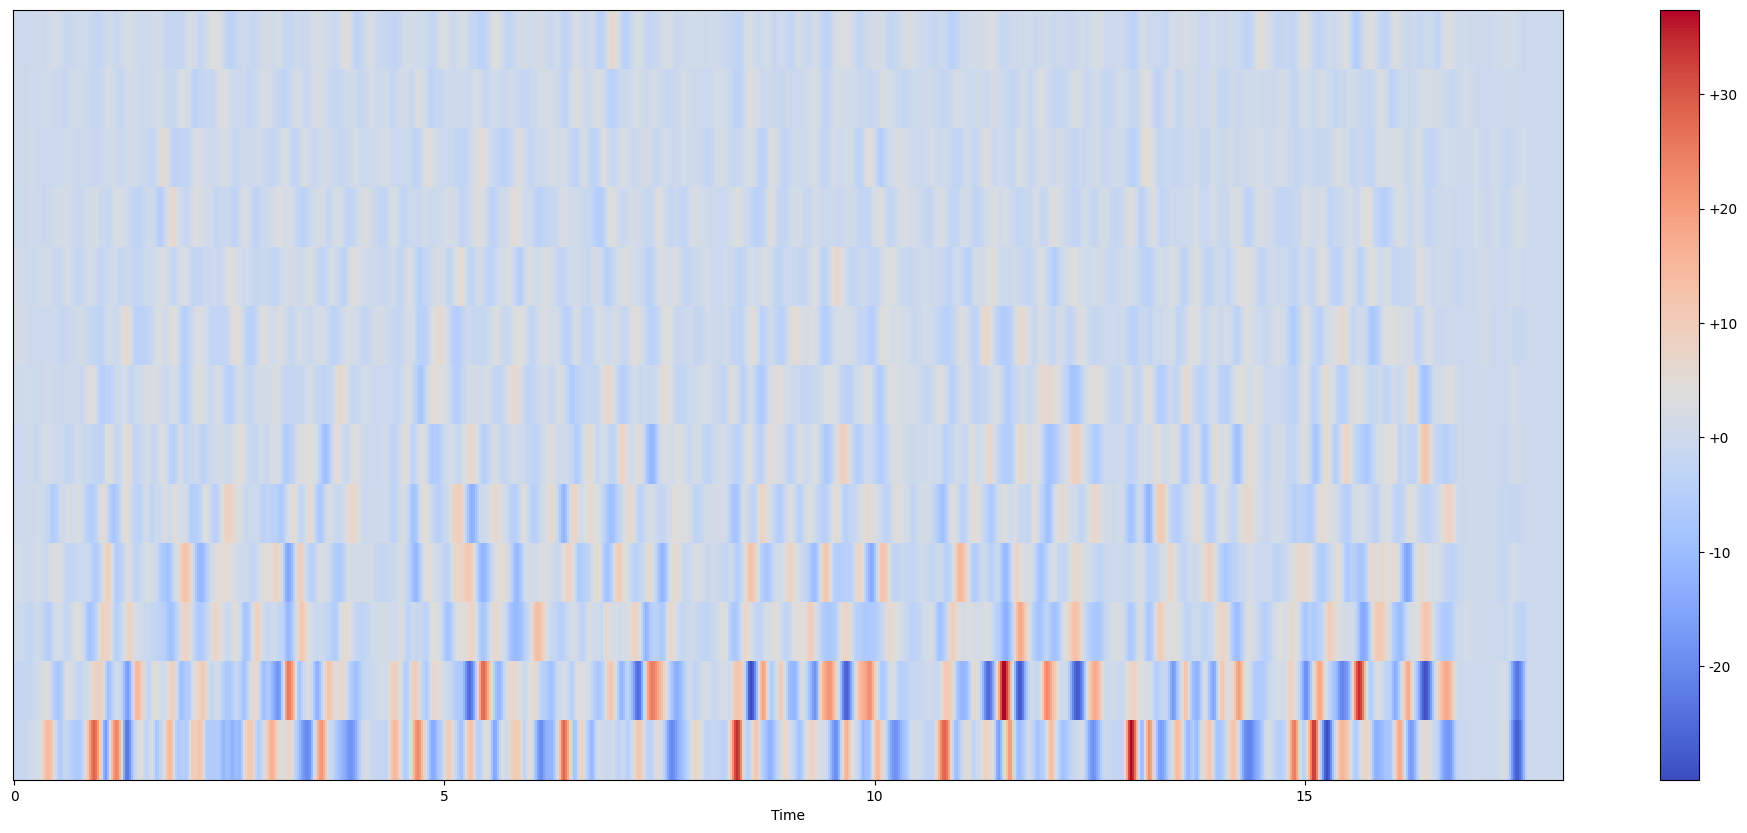

In [153]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

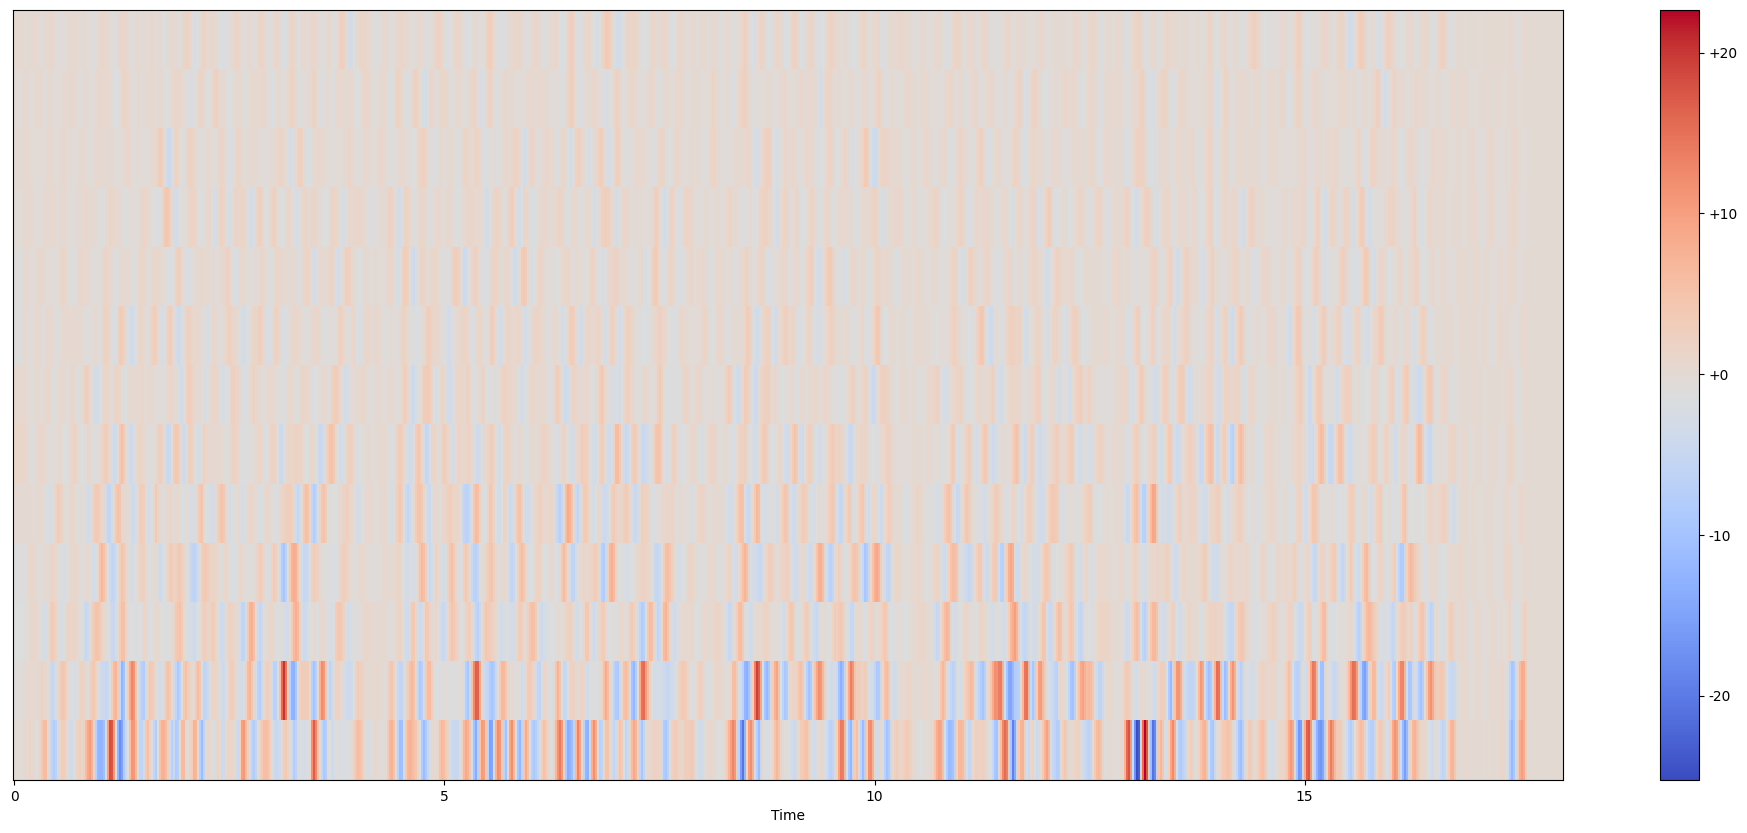

In [154]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [155]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [156]:
mfccs_features.shape

(39, 776)

### Create a table of the features

In [159]:
# TODO: Label columns?
# dataframe = pd.DataFrame(mfccs_features, columns=['Column 1', 'Column 2', 'Column 3'])
dataframe = pd.DataFrame(mfccs_features)

# Save the DataFrame to an Excel file
tableFilePath = tablesDirectory + filename + ".xlsx"
dataframe.to_excel(tableFilePath, index=False)

# tableFilePath = tablesDirectory + filename + ".csv"
# dataframe.to_csv(tableFilePath, index=False, header=True)
# Display the DataFrame
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Columns: 776 entries, 0 to 775
dtypes: float32(776)
memory usage: 118.3 KB
          0         1         2         3         4         5         6    \
0    1.000000  0.998702  0.997275  0.997261  0.997221  0.996749  0.996964   
1    0.998702  1.000000  0.998753  0.998560  0.998992  0.998398  0.998362   
2    0.997275  0.998753  1.000000  0.999933  0.999052  0.999036  0.999435   
3    0.997261  0.998560  0.999933  1.000000  0.998945  0.998913  0.999549   
4    0.997221  0.998992  0.999052  0.998945  1.000000  0.999833  0.999426   
..        ...       ...       ...       ...       ...       ...       ...   
771  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
772  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
773  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
774  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
775  0.9

0           1           2           3           4           5    \
0  -401.144501 -386.307495 -400.644653 -402.664490 -396.364532 -401.134064   
1   140.196304  148.532959  141.520020  138.872925  144.935394  142.048462   
2    17.624619   16.332390   23.153318   21.514763   26.501017   28.545147   
3    -5.037010    0.051680    3.253734    2.023765    8.188072   11.124820   
4    18.501560   17.824356   17.577572   15.522449   15.688343   17.601837   
5    15.282229    5.643308    4.369621    3.750325   -1.610354   -2.766489   
6     0.809618    0.521482    0.147531    1.914237   -1.443195   -3.593753   
7    -9.877697    0.286044    8.055564    8.984002    5.905724    6.488398   
8   -14.847260   -6.762642    2.271209    2.130858   -2.700595   -2.860647   
9    -7.937632   -3.300880   -1.240546   -1.824306   -6.203177   -7.344689   
10   -2.944915    1.147132    6.450386    4.692117   -2.817350   -0.309881   
11   -5.061674   -4.327226    5.594964    5.247504   -4.753919   -2.859329   
12    1.380071   -1.333215   -0.333641   -0.655644   -4.495718   -5.161746   
13   -1.358472   -1.358472   -1.358472   -1.358472   -1.358472   -1.769251   
14   -1.537027   -1.537027   -1.537027   -1.537027   -1.537027   -1.908581   
15   -0.172009   -0.172009   -0.172009   -0.172009   -0.172009   -0.884688   
16    0.864673    0.864673    0.864673    0.864673    0.864673   -0.279413   
17   -0.221662   -0.221662   -0.221662   -0.221662   -0.221662   -0.107305   
18   -1.228589   -1.228589   -1.228589   -1.228589   -1.228589    0.033341   
19    0.263686    0.263686    0.263686    0.263686    0.263686    0.599087   
20    1.686573    1.686573    1.686573    1.686573    1.686573    0.928018   
21    0.895652    0.895652    0.895652    0.895652    0.895652    0.259130   
22   -0.097026   -0.097026   -0.097026   -0.097026   -0.097026   -0.435207   
23    0.094468    0.094468    0.094468    0.094468    0.094468   -0.262308   
24    0.269119    0.269119    0.269119    0.269119    0.269119   -0.057759   
25   -0.404099   -0.404099   -0.404099   -0.404099   -0.404099   -0.460421   
26   -0.277365   -0.277365   -0.277365   -0.277365   -0.277365    0.560070   
27   -0.747626   -0.747626   -0.747626   -0.747626   -0.747626   -0.011108   
28   -1.339267   -1.339267   -1.339267   -1.339267   -1.339267   -1.269014   
29   -1.176147   -1.176147   -1.176147   -1.176147   -1.176147   -1.237526   
30    0.107504    0.107504    0.107504    0.107504    0.107504    0.070173   
31    1.209898    1.209898    1.209898    1.209898    1.209898    0.984122   
32    0.551281    0.551281    0.551281    0.551281    0.551281    0.602667   
33   -0.919688   -0.919688   -0.919688   -0.919688   -0.919688   -0.005303   
34   -1.095669   -1.095669   -1.095669   -1.095669   -1.095669   -0.067748   
35   -0.334995   -0.334995   -0.334995   -0.334995   -0.334995    0.085600   
36   -0.162617   -0.162617   -0.162617   -0.162617   -0.162617    0.244136   
37   -0.168362   -0.168362   -0.168362   -0.168362   -0.168362    0.155989   
38    0.394778    0.394778    0.394778    0.394778    0.394778    0.014760   

           6           7           8           9    ...           766  \
0  -404.127960 -403.929810 -406.945801 -405.546875  ... -5.585735e+02   
1   136.516479  132.780350  130.663239  133.197845  ...  0.000000e+00   
2    21.775913   15.741529   14.418730   13.680903  ...  0.000000e+00   
3     5.696102    4.937906    0.771976   -3.112267  ...  0.000000e+00   
4    15.375563   19.155140   14.759702   16.590029  ...  0.000000e+00   
5    -1.462045    4.165670    2.506659    7.295892  ...  0.000000e+00   
6    -1.173768    2.762584    5.121726    5.285608  ...  0.000000e+00   
7     8.597906    5.972739   11.508612   12.449113  ...  0.000000e+00   
8     1.219722   -3.591082   -2.017523    2.221752  ...  0.000000e+00   
9    -3.176727   -2.992225   -7.276324   -5.474797  ...  0.000000e+00   
10   -0.218537    3.027365    1.646895    0.997801  ...  0.000000e+00   
11   -2.938060

## Some visualizations and data summaries


In [161]:
# Display summary statistics for numerical columns
dataframe.describe()

# Display basic information about the DataFrame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Columns: 776 entries, 0 to 775
dtypes: float32(776)
memory usage: 118.3 KB


### Correlation Matrix

In [162]:
correlation_matrix = dataframe.corr()
print(correlation_matrix)

          0         1         2         3         4         5         6    \
0    1.000000  0.998702  0.997275  0.997261  0.997221  0.996749  0.996964   
1    0.998702  1.000000  0.998753  0.998560  0.998992  0.998398  0.998362   
2    0.997275  0.998753  1.000000  0.999933  0.999052  0.999036  0.999435   
3    0.997261  0.998560  0.999933  1.000000  0.998945  0.998913  0.999549   
4    0.997221  0.998992  0.999052  0.998945  1.000000  0.999833  0.999426   
..        ...       ...       ...       ...       ...       ...       ...   
771  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
772  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
773  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
774  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   
775  0.941514  0.933325  0.943155  0.945707  0.937976  0.940924  0.947117   

          7         8         9    ...       766       767       768  \
0  

### Correlation Heat Map

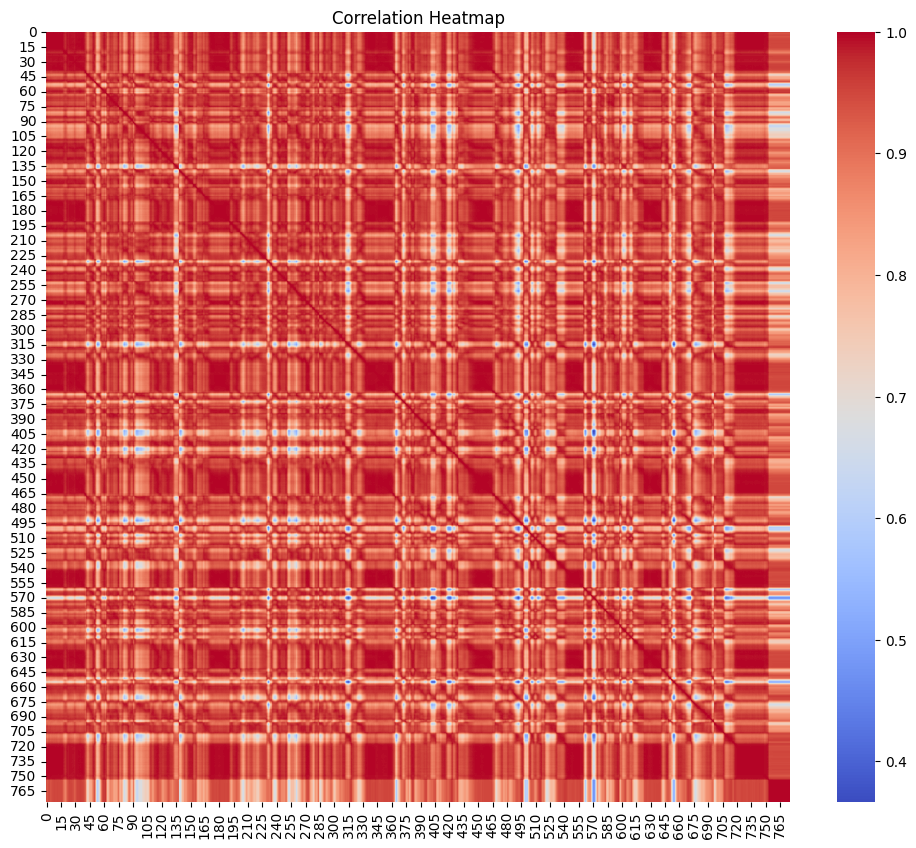

In [164]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(), cmap='coolwarm', annot=False, fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

TypeError: Singleton array array(22050) cannot be considered a valid collection.